# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray,rgba2rgb

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

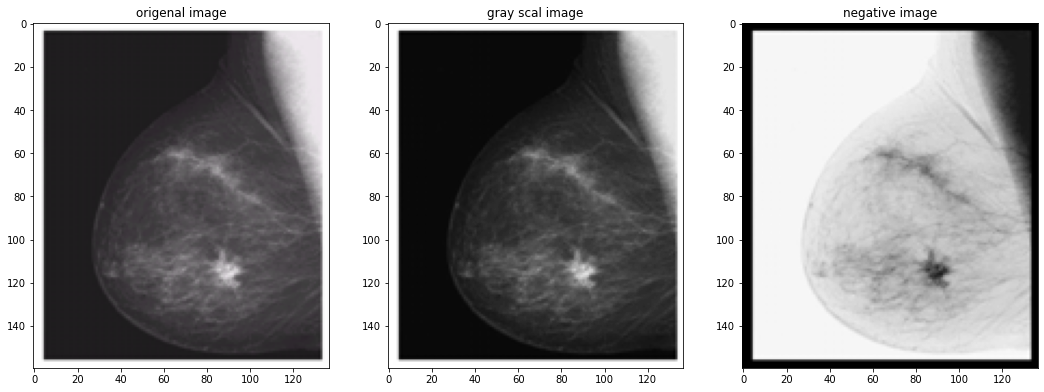

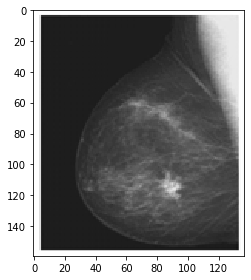

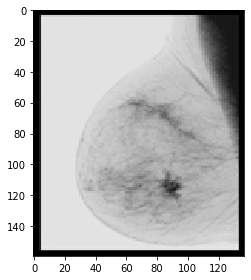

In [3]:
'''
1
Negative Transformation
'''
def gray_scale(image):
    gray_scale_image=image
    if(len(image.shape)==3):
        if(image.shape[2]==4):
            gray_scale_image=rgb2gray(rgba2rgb(image))
        else :
            gray_scale_image=rgb2gray(image)
    else :
        gray_scale_image=gray_scale_image/255
    return gray_scale_image


def negative(image,L):
    gray_scale_image=gray_scale(image)        
    return L-gray_scale_image

origenal_image=io.imread('./imgs/Picture1.png')
origenal_image_gray=gray_scale(io.imread('./imgs/Picture1.png'))

negative_images=negative(origenal_image,1)
images =[origenal_image,origenal_image_gray,negative_images]
titles= ['origenal image','gray scal image','negative image']
show_images(images,titles)
io.imshow(origenal_image_gray)
io.show()
io.imshow(negative_images)
io.show()

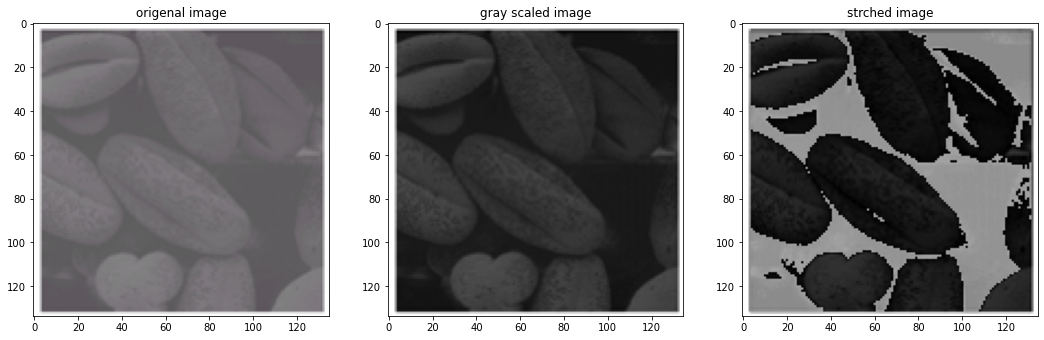

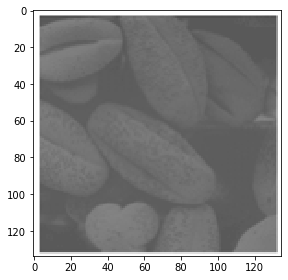

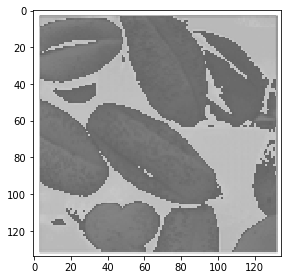

In [4]:
'''
2
Contrast Enhancement
'''
def Contrast_enhancement(image):
    image_gray=gray_scale(image)
    image_gray_255=image_gray*255
    image_gray_255[(image_gray_255<=100)]=image_gray_255[(image_gray_255<=100)]*1.5 + 50
    final_image=image_gray_255/255
    return final_image
    
origenal_image=io.imread('./imgs/Picture2.png')
origenal_image_gray=gray_scale(io.imread('./imgs/Picture2.png'))
final_image=Contrast_enhancement(origenal_image)
 
images=[origenal_image,origenal_image_gray,final_image]
titles=['origenal image','gray scaled image','strched image']
show_images(images,titles)
io.imshow(origenal_image_gray)
io.show()
io.imshow(final_image)
io.show()

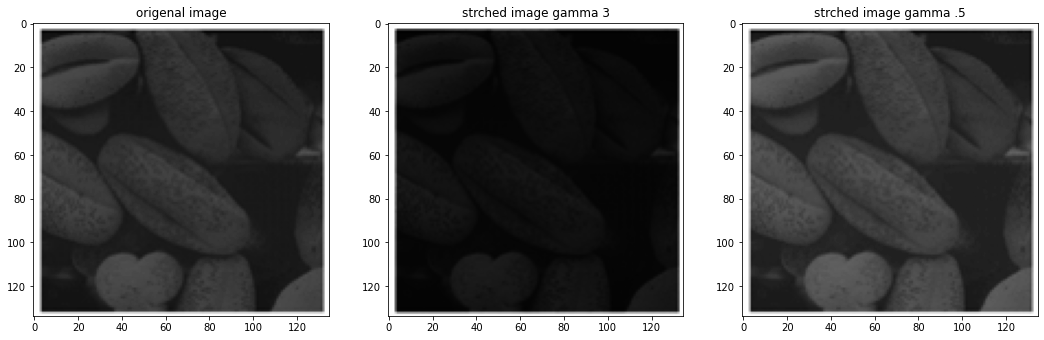

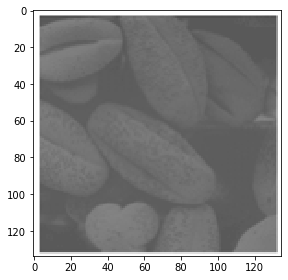

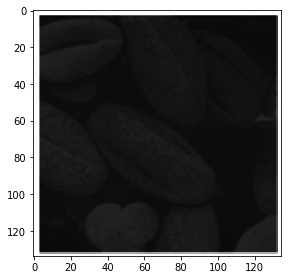

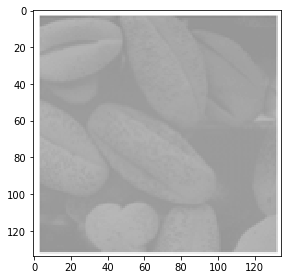

'\nWhat is the effect of decreasing 𝛾 ?\nwhen decreasing y then the image is much brighter because the gray values is less than 1 and when apply\nheigh power the the value will decrease and approach 0 "the black color" \nbut when apply lower powers then the value will increases and approch 1 "the white color"\n'

In [5]:
'''
3
Gamma Correction
'''
def Gamma_Correction(image,c,gamma):
    #image_gray=rgb2gray(image)
    final_image=c*(image ** gamma)
    return final_image
origenal_image=io.imread('./imgs/Picture2.png', as_gray=1)
# origenal_image_gray=gray_scale(origenal_image)

final_image_gamma3=Gamma_Correction(origenal_image,1,3)
final_image_gamma05=Gamma_Correction(origenal_image,1,0.5)

titles=['origenal image','strched image gamma 3','strched image gamma .5']
images=[origenal_image,final_image_gamma3,final_image_gamma05]
show_images(images,titles)
io.imshow(origenal_image)
io.show()


io.imshow(final_image_gamma3)
io.show()

io.imshow(final_image_gamma05)
io.show()

'''
What is the effect of decreasing 𝛾 ?
when decreasing y then the image is much brighter because the gray values is less than 1 and when apply
heigh power the the value will decrease and approach 0 "the black color" 
but when apply lower powers then the value will increases and approch 1 "the white color"
'''

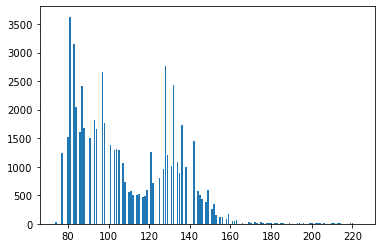

In [6]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
def getImageWithHist(name,nbins=256):
    origenal_image_gray=(gray_scale(name))*255
    origenal_image_gray=np.round_(origenal_image_gray,decimals = 0 )
    N=origenal_image_gray.shape[0]
    M=origenal_image_gray.shape[1]
    print(N,M)
    G=nbins
    H=np.zeros(G)
    normal_histo=np.histogram(origenal_image_gray,255,[0,255])[0]
    
    H=[sum(normal_histo[x:x+round(256/G)]) for x in range(0,256-round(256/G)+1,round(256/G))]
    H_c=[sum(H[0:x]) for x in range(1,G+1)]
    q=[round((G-1) * H_c[p] /(N * M)) for p in range(0,G)]
    
    
    equlized_image=origenal_image_gray.copy()
    old_levels=np.floor(equlized_image*G/256)
    new_levels=old_levels.copy()
    for y in new_levels:
        for x in range(len(y)):
            y[x]=q[int(y[x])]

    equlized_image[(1==1)]=round(256/G)*(new_levels)  + (equlized_image-np.floor(equlized_image*G/256)*round(256/G))
    return equlized_image
    
origenal_image1=io.imread('./imgs/pout.tif')
origenal_image2=io.imread('./imgs/tire.tif')
origenal_image_gray1=(gray_scale(origenal_image1))*255
origenal_image_gray2=(gray_scale(origenal_image2))*255
origenal_image_gray1=np.round_(origenal_image_gray1,decimals = 0 )
origenal_image_gray2=np.round_(origenal_image_gray2,decimals = 0 )

N=origenal_image_gray.shape[0]
M=origenal_image_gray.shape[1]


G=8
H=np.zeros(G)
# origenal_image_gray=origenal_image_gray1/255
showHist(origenal_image_gray1)

normal_histo=np.histogram(origenal_image_gray,255,[0,255])[0]

# print(normal_histo)


In [14]:
# lists = [10,0, 30, 40, 50,60,70,80,90,100]
# C_lists=[sum(lists[0:x:1]) for x in range(1, len(lists)+1)]
# sum(lists[2:4]) 
# print(C_lists)
# H=[sum(normal_histo[x:x+round(256/G)]) for x in range(0,256-round(256/G)+1,round(256/G))]

# H_c=[sum(H[0:x]) for x in range(1,G+1)]
# q=[round((G-1) * H_c[p] /(N * M)) for p in range(0,G)]
# print(H)
# print(H_c)
# print(q)
# print(sum(normal_histo[:]))
# print(M*N)

# equlized_image=origenal_image_gray.copy()
# old_levels=np.floor(equlized_image*G/256)
# new_levels=old_levels.copy()
# for y in new_levels:
#     for x in range(len(y)):
#         y[x]=q[int(y[x])]
        
        
        
# equlized_image[(1==1)]=round(256/G)*(new_levels)  + (equlized_image-np.floor(equlized_image*G/256)*round(256/G))
# for y in np.floor(equlized_image*G /256):
#     [print(q[int(x)]) for x in y ]

In [15]:
# print(np.floor(equlized_image))
# old_levels=np.floor(equlized_image*G/256)
# new_levels=old_levels.copy()
# for y in new_levels:
#     for x in range(len(y)):
#         y[x]=q[int(y[x])]
# # print(old_levels)
# # print(new_levels)
# print(origenal_image_gray)

In [16]:
# images=[origenal_image_gray/255,equlized_image/255]
# show_images(images)

# io.imshow(origenal_image_gray/255)
# io.show()

# io.imshow(equlized_image/255)
# io.show()

In [17]:
# showHist(origenal_image_gray)
# showHist(equlized_image)

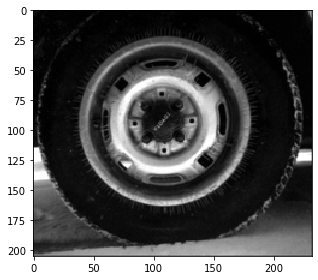

In [18]:
origenal_image=io.imread('./imgs/tire.tif')
# images=[origenal_image/255]
# show_images(origenal_image)

io.imshow(origenal_image)
io.show()



291 240


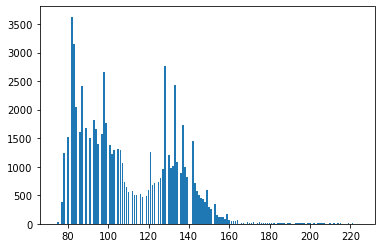

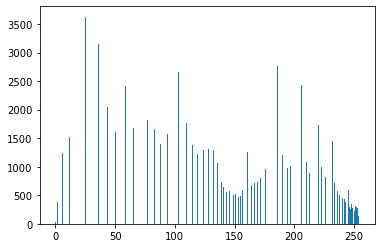

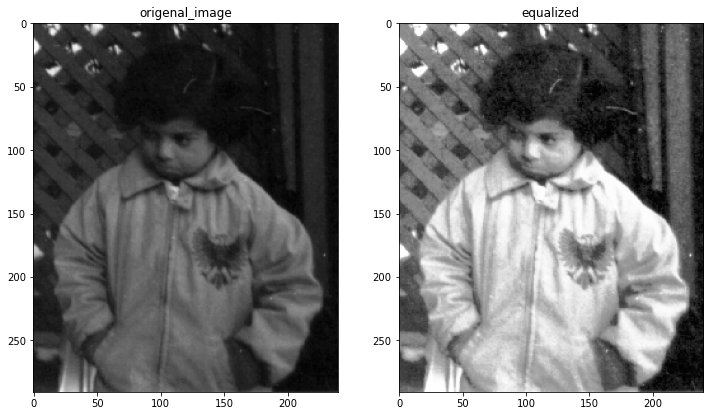

In [19]:
origenal_image=io.imread('./imgs/pout.tif')
equalized=getImageWithHist(origenal_image)
showHist(origenal_image)
showHist(equalized)

# images=[origenal_image,equalized]
# titles=['origenal_image','']
show_images([origenal_image,equalized],['origenal_image','equalized'])

205 232


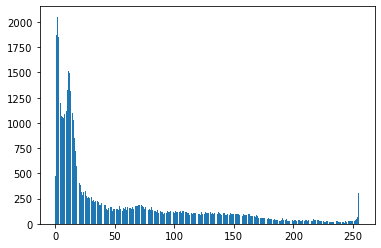

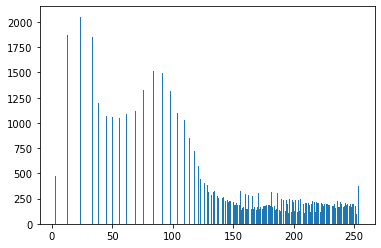

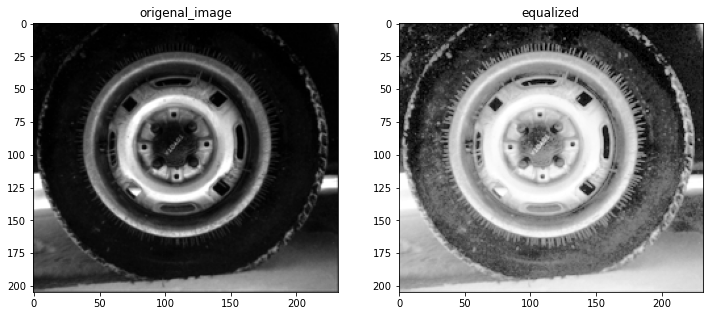

In [20]:
origenal_image=io.imread('./imgs/tire.tif')
equalized=getImageWithHist(origenal_image)
showHist(origenal_image)
showHist(equalized)

# images=[origenal_image,equalized]
# titles=['origenal_image','']
show_images([origenal_image,equalized],['origenal_image','equalized'])

1850 3000
239 317


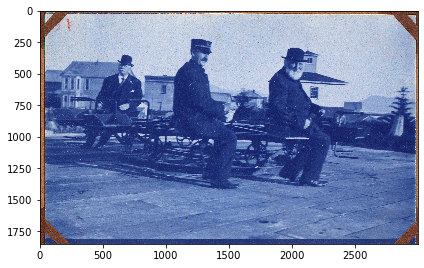

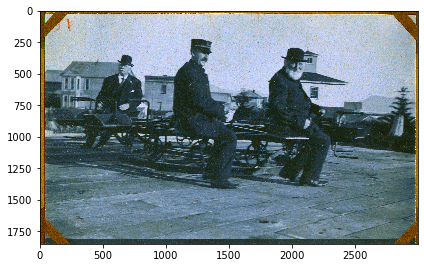

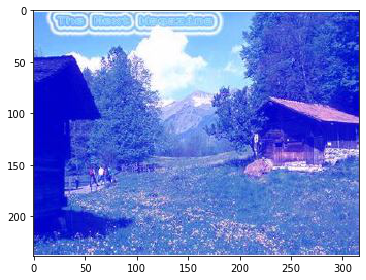

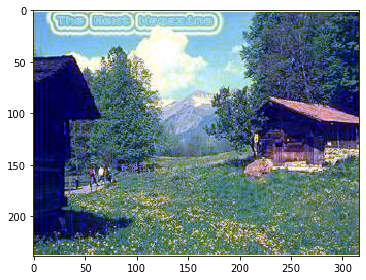

In [23]:
image1=io.imread('./1.jpg')
image2=io.imread('./2.jpg')

image1_modified=image1.copy()
image2_modified=image2.copy()
image1_modified[:,:,2]=getImageWithHist(image1[:,:,2])
image2_modified[:,:,2]=getImageWithHist(image2[:,:,2])
io.imshow(image1)
io.show()
io.imshow(image1_modified)
io.show()
io.imshow(image2)
io.show()
io.imshow(image2_modified)
io.show()